## Seleção de Características dos Microdados ENEM

por Kizzy Terra

A seleção de caracteríticas consiste de selecionar e excluir características sem mofificá-las e abrange alguns tipos de operações no conjunto de dados tais como: *remoção de valores ausentes ou com baixa variância, remoção de caraterísticas altamente correlaciondas, e também seleção utilizando algum modelo de treinamento.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn import decomposition
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import f_regression, mutual_info_regression
%matplotlib inline

In [2]:
#datasets paths'
ENEM_FILE_PATH = '/Users/kizzyterra/Workspace/analise-dados/projetos/dados/microdados-enem-2018/DADOS/MICRODADOS_ENEM_2018.csv'
QUEST_FILE_PATH = '/Users/kizzyterra/Workspace/analise-dados/projetos/dados/microdados-enem-2018/DICIONARIO/questoes_microdados_enem_2018.csv'

In [3]:
microdados_enem = pd.read_csv(ENEM_FILE_PATH, sep=";", encoding='ISO-8859-1')

In [4]:
microdados_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


In [5]:
microdados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

### 1. Eliminando características com baixa variância

As características a seguir são específicas de grupos pequenos de alunos que solicitaram ajuda específica durante a prova conforme indicado no dicionário de dados. Tais caracteríscticas são numéricas e binárias e recebem valor 1 quando o candidato apresenta tal condição e 0, caso contrário. Analisaremos sua distribuição para identificar sua relevância para os passos a seguir. Existe a hipótese de que essas colunas possam ser desconsideradas pois possuem baixa variância quando olhamos sua distribuição no conjunto de dados completo:

In [6]:
removed_cols = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
   'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
   'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
   'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
   'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
   'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
   'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
   'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
   'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
   'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
   'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
   'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
   'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
   'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
   'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
   'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
   'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL']

Analisando a variância das colunas:

In [7]:
microdados_enem[removed_cols].std()

IN_BAIXA_VISAO                 0.030845
IN_CEGUEIRA                    0.011724
IN_SURDEZ                      0.016187
IN_DEFICIENCIA_AUDITIVA        0.020928
IN_SURDO_CEGUEIRA              0.001535
IN_DEFICIENCIA_FISICA          0.040209
IN_DEFICIENCIA_MENTAL          0.018817
IN_DEFICIT_ATENCAO             0.036110
IN_DISLEXIA                    0.016035
IN_DISCALCULIA                 0.007376
IN_AUTISMO                     0.011847
IN_VISAO_MONOCULAR             0.015933
IN_OUTRA_DEF                   0.029168
IN_GESTANTE                    0.017965
IN_LACTANTE                    0.031210
IN_IDOSO                       0.006787
IN_ESTUDA_CLASSE_HOSPITALAR    0.002446
IN_SEM_RECURSO                 0.041506
IN_BRAILLE                     0.007944
IN_AMPLIADA_24                 0.015157
IN_AMPLIADA_18                 0.026664
IN_LEDOR                       0.032338
IN_ACESSO                      0.041232
IN_TRANSCRICAO                 0.031282
IN_LIBRAS                      0.014136


In [8]:
microdados_enem[removed_cols].var()

IN_BAIXA_VISAO                 0.000951
IN_CEGUEIRA                    0.000137
IN_SURDEZ                      0.000262
IN_DEFICIENCIA_AUDITIVA        0.000438
IN_SURDO_CEGUEIRA              0.000002
IN_DEFICIENCIA_FISICA          0.001617
IN_DEFICIENCIA_MENTAL          0.000354
IN_DEFICIT_ATENCAO             0.001304
IN_DISLEXIA                    0.000257
IN_DISCALCULIA                 0.000054
IN_AUTISMO                     0.000140
IN_VISAO_MONOCULAR             0.000254
IN_OUTRA_DEF                   0.000851
IN_GESTANTE                    0.000323
IN_LACTANTE                    0.000974
IN_IDOSO                       0.000046
IN_ESTUDA_CLASSE_HOSPITALAR    0.000006
IN_SEM_RECURSO                 0.001723
IN_BRAILLE                     0.000063
IN_AMPLIADA_24                 0.000230
IN_AMPLIADA_18                 0.000711
IN_LEDOR                       0.001046
IN_ACESSO                      0.001700
IN_TRANSCRICAO                 0.000979
IN_LIBRAS                      0.000200


In [9]:
microdados_enem[removed_cols].median()

IN_BAIXA_VISAO                 0.0
IN_CEGUEIRA                    0.0
IN_SURDEZ                      0.0
IN_DEFICIENCIA_AUDITIVA        0.0
IN_SURDO_CEGUEIRA              0.0
IN_DEFICIENCIA_FISICA          0.0
IN_DEFICIENCIA_MENTAL          0.0
IN_DEFICIT_ATENCAO             0.0
IN_DISLEXIA                    0.0
IN_DISCALCULIA                 0.0
IN_AUTISMO                     0.0
IN_VISAO_MONOCULAR             0.0
IN_OUTRA_DEF                   0.0
IN_GESTANTE                    0.0
IN_LACTANTE                    0.0
IN_IDOSO                       0.0
IN_ESTUDA_CLASSE_HOSPITALAR    0.0
IN_SEM_RECURSO                 0.0
IN_BRAILLE                     0.0
IN_AMPLIADA_24                 0.0
IN_AMPLIADA_18                 0.0
IN_LEDOR                       0.0
IN_ACESSO                      0.0
IN_TRANSCRICAO                 0.0
IN_LIBRAS                      0.0
IN_LEITURA_LABIAL              0.0
IN_MESA_CADEIRA_RODAS          0.0
IN_MESA_CADEIRA_SEPARADA       0.0
IN_APOIO_PERNA      

Como suposto tais variáveis possuem baixa variância e por essa razão serão removidas do conjunto de melhores features.

### 2. Eliminando redundâncias

Além disso, iremos eliminar colunas redundantes, por exemplo: *'NO_MUNICIPIO_RESIDENCIA'* equivalente a *'CO_MUNICIPIO_RESIDENCIA'*. A primeira característica(nome do município) é a descrição da primeira(código do município). 

In [10]:
microdados_enem[['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA', 
                 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
                 'CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC', 'SG_UF_ESC', 
                 'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA']].corr()

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,CO_MUNICIPIO_ESC,CO_UF_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA
CO_MUNICIPIO_RESIDENCIA,1.000000,0.999859,0.875779,0.875621,0.998203,0.998054,0.993633,0.993480
CO_UF_RESIDENCIA,0.999859,1.000000,0.875197,0.875255,0.998055,0.998196,0.993501,0.993608
CO_MUNICIPIO_NASCIMENTO,0.875779,0.875197,1.000000,0.999854,0.906868,0.906403,0.873375,0.872779
CO_UF_NASCIMENTO,0.875621,0.875255,0.999854,1.000000,0.906702,0.906480,0.873220,0.872836
CO_MUNICIPIO_ESC,0.998203,0.998055,0.906868,0.906702,1.000000,0.999849,0.996062,0.995916
CO_UF_ESC,0.998054,0.998196,0.906403,0.906480,0.999849,1.000000,0.995925,0.996055
CO_MUNICIPIO_PROVA,0.993633,0.993501,0.873375,0.873220,0.996062,0.995925,1.000000,0.999860
CO_UF_PROVA,0.993480,0.993608,0.872779,0.872836,0.995916,0.996055,0.999860,1.000000


In [11]:
microdados_enem[['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA', 
                 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
                 'CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC', 'SG_UF_ESC', 
                 'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA']].head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA
0,5300108,Brasília,53,DF,NaN,NaN,NaN,NaN,5208707.0,Goiânia,52.0,GO,5210208,Iporá,52,GO
1,2111102,São João dos Patos,21,MA,2111102.0,São João dos Patos,21.0,MA,NaN,NaN,NaN,NaN,2111102,São João dos Patos,21,MA
2,3530607,Mogi das Cruzes,35,SP,4209300.0,Lages,42.0,SC,NaN,NaN,NaN,NaN,4314902,Porto Alegre,43,RS
3,2916401,Itapetinga,29,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2916401,Itapetinga,29,BA
4,2918100,Jeremoabo,29,BA,2800308.0,Aracaju,28.0,SE,2918100.0,Jeremoabo,29.0,BA,2918100,Jeremoabo,29,BA


In [12]:
microdados_enem[['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA', 
                 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
                 'CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC', 'SG_UF_ESC', 
                 'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA']].columns

Index(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA'],
      dtype='object')

### 3. Tratando dados ausentes

Observando as características remanescentes em três grupos (para facilitar a visualiação):

In [13]:
microdados_enem.isna().sum()

NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q023                       0
Q024                       0
Q025                       0
Q026                       4
Q027                       0
Length: 137, dtype: int64

In [14]:
microdados_enem[['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO', 
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC','CO_UF_ESC', 
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC']].isna().sum()

NU_INSCRICAO                     0
NU_ANO                           0
CO_MUNICIPIO_RESIDENCIA          0
CO_UF_RESIDENCIA                 0
NU_IDADE                        97
TP_SEXO                          0
TP_ESTADO_CIVIL             217637
TP_COR_RACA                      0
TP_NACIONALIDADE                 0
CO_MUNICIPIO_NASCIMENTO     185783
CO_UF_NASCIMENTO            185783
TP_ST_CONCLUSAO                  0
TP_ANO_CONCLUIU                  0
TP_ESCOLA                        0
TP_ENSINO                  2030666
IN_TREINEIRO                     0
CO_ESCOLA                  4064926
CO_MUNICIPIO_ESC           4064926
CO_UF_ESC                  4064926
TP_DEPENDENCIA_ADM_ESC     4064926
TP_LOCALIZACAO_ESC         4064926
TP_SIT_FUNC_ESC            4064926
dtype: int64

In [15]:
microdados_enem[['CO_MUNICIPIO_PROVA', 'CO_UF_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']].isna().sum()

CO_MUNICIPIO_PROVA          0
CO_UF_PROVA                 0
TP_PRESENCA_CN            155
TP_PRESENCA_CH            155
TP_PRESENCA_LC            155
TP_PRESENCA_MT            155
CO_PROVA_CN           1608648
CO_PROVA_CH           1365483
CO_PROVA_LC           1365483
CO_PROVA_MT           1608648
NU_NOTA_CN            1608648
NU_NOTA_CH            1365483
NU_NOTA_LC            1365483
NU_NOTA_MT            1608648
TX_RESPOSTAS_CN       1608648
TX_RESPOSTAS_CH       1365483
TX_RESPOSTAS_LC       1365483
TX_RESPOSTAS_MT       1608648
TP_LINGUA                   0
TX_GABARITO_CN        1608648
TX_GABARITO_CH        1365483
TX_GABARITO_LC        1365483
TX_GABARITO_MT        1608648
TP_STATUS_REDACAO     1365483
NU_NOTA_COMP1         1365483
NU_NOTA_COMP2         1365483
NU_NOTA_COMP3         1365483
NU_NOTA_COMP4         1365483
NU_NOTA_COMP5         1365483
NU_NOTA_REDACAO       1365483
dtype: int64

In [16]:
microdados_enem[['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027']].isna().sum()

Q001    0
Q002    0
Q003    0
Q004    0
Q005    0
Q006    0
Q007    0
Q008    0
Q009    0
Q010    0
Q011    0
Q012    0
Q013    0
Q014    0
Q015    0
Q016    0
Q017    0
Q018    0
Q019    0
Q020    0
Q021    0
Q022    0
Q023    0
Q024    0
Q025    0
Q026    4
Q027    0
dtype: int64

### Estratégias para remoção de dados ausentes

Aqui entramos na etapa de análise dos valores ausentes e como deverão ser tratados: 

1. As colunas com dados da escola não são de preenchimento obrigatório e possuem muitos valores ausentes, aproximadamente 80% das linhas não possuem esse dado e por essa razão essas colunas não serão adicionadas ao grupo de melhores características:

2.  A coluna TP_ENSINO será removida sem prejuízo uma vez que existem outras colunas tais como TP_ESCOLA e Q027 que   

3. A coluna que indica o estado civil é uma variável caetgórica numérica que assume os seguintes valores:

Iremos tratar as 217.637 entradas ausentes como uma quinta categoria: 
    
4 - Não informado

In [17]:
microdados_enem['TP_ESTADO_CIVIL'].isna().sum()

217637

In [18]:
microdados_enem['TP_ESTADO_CIVIL'] = microdados_enem['TP_ESTADO_CIVIL'].fillna(4)

In [19]:
microdados_enem['TP_ESTADO_CIVIL'].isna().sum()

0

4. A coluna idade possui apenas 97 ausentes, iremos remover essas linhas do dataset:

In [20]:
microdados_enem = microdados_enem.dropna(subset=['NU_IDADE'])

In [21]:
microdados_enem['NU_IDADE'].isna().sum()

0

5. Para as variáveis *CO_MUNICIPIO_NASCIMENTO* e *CO_UF_NASCIMENTO* podemos preencher os valores ausentes a partir das colunas *CO_MUNICIPIO_RESIDENCIA* e *CO_UF_RESIDENCIA* para tanto iremos verificar a correlação entre as variáveis:

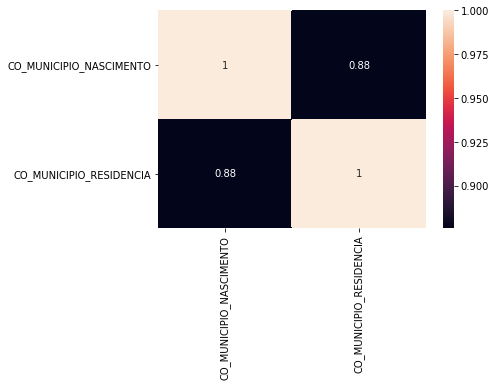

In [22]:
sns.heatmap(microdados_enem[['CO_MUNICIPIO_NASCIMENTO', 'CO_MUNICIPIO_RESIDENCIA']].corr().round(4), annot=True)

Observando a correlação de 87,57% e a fração de ausentes 187.783 em 5.513.747 entradas substituir a informação de RESIDENCIA por NASCIMENTO mostra-se uma solução razoável que insere uma imprecisão estatisticamente pouco relevante. 

In [23]:
microdados_enem['CO_MUNICIPIO_NASCIMENTO'].fillna(microdados_enem['CO_MUNICIPIO_RESIDENCIA'], inplace = True)
microdados_enem['CO_UF_NASCIMENTO'].fillna(microdados_enem['CO_UF_RESIDENCIA'], inplace = True)

In [24]:
microdados_enem[['CO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO']].isna().sum()

CO_MUNICIPIO_NASCIMENTO    0
CO_UF_NASCIMENTO           0
dtype: int64

As colunas de notas são colunas target e devem estar completamente preenchidas, portanto temos optar por remover os ausentes ou completá-la.

In [25]:
microdados_enem = microdados_enem.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                         'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [26]:
microdados_enem[['CO_MUNICIPIO_PROVA', 'CO_UF_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']].isna().sum()

CO_MUNICIPIO_PROVA    0
CO_UF_PROVA           0
TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
TP_PRESENCA_MT        0
CO_PROVA_CN           0
CO_PROVA_CH           0
CO_PROVA_LC           0
CO_PROVA_MT           0
NU_NOTA_CN            0
NU_NOTA_CH            0
NU_NOTA_LC            0
NU_NOTA_MT            0
TX_RESPOSTAS_CN       0
TX_RESPOSTAS_CH       0
TX_RESPOSTAS_LC       0
TX_RESPOSTAS_MT       0
TP_LINGUA             0
TX_GABARITO_CN        0
TX_GABARITO_CH        0
TX_GABARITO_LC        0
TX_GABARITO_MT        0
TP_STATUS_REDACAO     0
NU_NOTA_COMP1         0
NU_NOTA_COMP2         0
NU_NOTA_COMP3         0
NU_NOTA_COMP4         0
NU_NOTA_COMP5         0
NU_NOTA_REDACAO       0
dtype: int64

Existem quatro linhas com valor ausente na questão 26 e iremos removê-las:

In [27]:
microdados_enem[['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027']].isna().sum()

Q001    0
Q002    0
Q003    0
Q004    0
Q005    0
Q006    0
Q007    0
Q008    0
Q009    0
Q010    0
Q011    0
Q012    0
Q013    0
Q014    0
Q015    0
Q016    0
Q017    0
Q018    0
Q019    0
Q020    0
Q021    0
Q022    0
Q023    0
Q024    0
Q025    0
Q026    4
Q027    0
dtype: int64

In [28]:
microdados_enem = microdados_enem.dropna(subset=['Q026'])

#### Resultado da primeira etapa de seleção de características

Finalmente separaremos as características em dois grupos: 

*microdados_enem_features* - são caractrísticas que descrevem os alunos 

*microdados_enem_target* - são as característicss-alvo referentes aos resultados dos alunos nas provas. 

In [29]:
microdados_enem_features = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO', 
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 
       'Q021', 'Q022','Q023', 'Q024', 'Q025', 'Q026', 'Q027']


microdados_enem_target = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                          'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [30]:
X = microdados_enem[microdados_enem_features]

In [31]:
y = microdados_enem[microdados_enem_target]

In [32]:
X.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
1,180007197856,2111102,21,23.0,F,0.0,3,1,2111102.0,21.0,...,A,B,A,A,B,A,A,A,A,A
5,180007239581,2507507,25,23.0,F,0.0,1,1,2507507.0,25.0,...,A,B,A,A,B,A,B,B,A,A
7,180008090447,2207702,22,39.0,M,1.0,3,1,2205706.0,22.0,...,A,C,B,A,B,A,B,B,A,A
8,180008257068,2304400,23,19.0,M,0.0,3,1,2304400.0,23.0,...,A,B,B,A,B,A,A,A,B,A
9,180008202044,5103403,51,25.0,F,0.0,3,1,2903201.0,29.0,...,A,B,A,A,B,A,A,A,A,A


In [33]:
y.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,521.0,568.7,513.1,480.3,280.0
5,461.8,564.0,466.8,538.8,580.0
7,499.3,663.2,605.2,733.8,680.0
8,411.8,429.8,445.2,459.0,340.0
9,469.4,650.2,606.6,525.4,740.0


A tabela *target* possui as notas dos alunos nas provas do ENEM. Utilizaremos elas para criar novas colunas target com as  médias dos alunos considerando os cursos de Medicina, Direito e Engenharia, e a média simples das notas.

In [34]:
med_weights_usp = {"CN": 2.0, "CH": 2.0, "LC": 4.0, "MT":3.0 , "REDACAO":  2.0, "TOTAL": 13.0}
med_cuts_usp = {"AC" : 858.44, "EP": 793.29, "PPI": 767.15}
med_weights_ufrj = {"CN": 2.0, "CH": 1.0, "LC": 2.0, "MT":1.0 , "REDACAO":  3.0, "TOTAL": 9.0}
med_cuts_ufrj = {"AC" : 822.46, "EP": 805.53}

eng_weights_ufrj = {"CN": 4.0, "CH": 2.0, "LC": 2.0, "MT":4.0 , "REDACAO":  3.0, "TOTAL": 15.0}
eng_cuts_ufrj = {"AC" : 774.29, "EP": 664.61}

dir_weights_ufrj = {"CN": 1.0, "CH": 2.0, "LC": 2.0, "MT":1.0 , "REDACAO":  3.0, "TOTAL": 8.0}
dir_cuts_ufrj = {"AC" : 789.17, "EP": 771.61}

Fonte: http://portalbi.mec.gov.br/portal-bi/relatorios/simulador_sisu/painel_direto.php


https://sisusimulator.com.br/ufrj/cidade-universitaria/engenharia-civil-bacharelado

In [35]:
y['MEAN'] = (y.NU_NOTA_CN+ y.NU_NOTA_CH+ y.NU_NOTA_LC + y.NU_NOTA_MT + y.NU_NOTA_REDACAO)/5

y['DIR_UFRJ'] = (y.NU_NOTA_CN*dir_weights_ufrj['CN'] + y.NU_NOTA_CH*dir_weights_ufrj['CH'] + \
              y.NU_NOTA_LC*dir_weights_ufrj['LC'] + y.NU_NOTA_MT*dir_weights_ufrj['MT'] + \
              y.NU_NOTA_REDACAO*dir_weights_ufrj['REDACAO'])/dir_weights_ufrj['TOTAL']

y['ENG_UFRJ'] = (y.NU_NOTA_CN*eng_weights_ufrj['CN'] + y.NU_NOTA_CH*eng_weights_ufrj['CH'] + \
              y.NU_NOTA_LC*eng_weights_ufrj['LC'] + y.NU_NOTA_MT*eng_weights_ufrj['MT'] + \
              y.NU_NOTA_REDACAO*eng_weights_ufrj['REDACAO'])/eng_weights_ufrj['TOTAL']

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Além de criar colunas com as médias das notas criamos colunas categóricas numéricas para os cursos de medicina que indicam se a média do aluno seria suficente para superar a note de corte mínima para aprovação:

In [36]:
y['MED_UFRJ'] = (y.NU_NOTA_CN*med_weights_ufrj['CN'] + y.NU_NOTA_CH*med_weights_ufrj['CH'] + \
              y.NU_NOTA_LC*med_weights_ufrj['LC'] + y.NU_NOTA_MT*med_weights_ufrj['MT'] + \
              y.NU_NOTA_REDACAO*med_weights_ufrj['REDACAO'])/med_weights_ufrj['TOTAL']
y['MED_UFRJ_AC_LABEL'] = y['MED_UFRJ'].map(lambda x: 1 if x >= med_cuts_ufrj['AC'] else 0)
y['MED_UFRJ_EP_LABEL'] = y['MED_UFRJ'].map(lambda x: 1 if x >= med_cuts_ufrj['EP'] else 0)

y['MED_USP'] = (y.NU_NOTA_CN*med_weights_usp['CN'] + y.NU_NOTA_CH*med_weights_usp['CH'] + \
              y.NU_NOTA_LC*med_weights_usp['LC'] + y.NU_NOTA_MT*med_weights_usp['MT'] + \
              y.NU_NOTA_REDACAO*med_weights_usp['REDACAO'])/med_weights_usp['TOTAL']
y['MED_USP_AC_LABEL'] = y['MED_USP'].map(lambda x: 1 if x >= med_cuts_usp['AC'] else 0)
y['MED_USP_EP_LABEL'] = y['MED_USP'].map(lambda x: 1 if x >= med_cuts_usp['EP'] else 0)
y['MED_USP_PPI_LABEL'] = y['MED_USP'].map(lambda x: 1 if x >= med_cuts_usp['PPI'] else 0)


/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: Setting

Por último fazemos uma discretização da coluna com as médias para crair cinco grupos distintos para intervalos de notas:

In [37]:
y['MEAN_GROUPS'] = pd.cut(y.MEAN, bins=5, labels=[0,1,2,3,4])

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
y['MEAN_GROUPS'].value_counts()

3    1864377
2    1837664
4     178064
1      13385
0        177
Name: MEAN_GROUPS, dtype: int64

Finalmente, obtemos todos os dados alvos que serão utilizados para a seleção de features utilizando modelos de aprendizado de máquina.

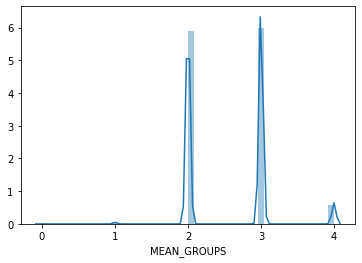

In [39]:
sns.distplot(y.MEAN_GROUPS)

Observação: Podemos observar que os grupos não são igualmente distribuídos. Rigorosamente, seria melhor que o fossem, mas optamos por manter dessa forma, sem perda do objetivo didático de exploração das features. Fica para o leitor o exercício de redistribuir os grupos.

In [40]:
y.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEAN,DIR_UFRJ,ENG_UFRJ,MED_UFRJ,MED_UFRJ_AC_LABEL,MED_UFRJ_EP_LABEL,MED_USP,MED_USP_AC_LABEL,MED_USP_EP_LABEL,MED_USP_PPI_LABEL,MEAN_GROUPS
1,521.0,568.7,513.1,480.3,280.0,472.62,500.6125,467.253333,439.688889,0,0,479.438462,0,0,0,2
5,461.8,564.0,466.8,538.8,580.0,522.28,600.2750,520.266667,522.222222,0,0,515.015385,0,0,0,3
7,499.3,663.2,605.2,733.8,680.0,636.30,726.2375,633.946667,627.333333,0,0,639.015385,0,0,0,3
8,411.8,429.8,445.2,459.0,340.0,417.16,455.1000,416.880000,402.533333,0,0,424.692308,0,0,0,2
9,469.4,650.2,606.6,525.4,740.0,598.32,716.0500,580.853333,616.400000,0,0,593.984615,0,0,0,3


In [41]:
y.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'MEAN', 'DIR_UFRJ', 'ENG_UFRJ', 'MED_UFRJ',
       'MED_UFRJ_AC_LABEL', 'MED_UFRJ_EP_LABEL', 'MED_USP', 'MED_USP_AC_LABEL',
       'MED_USP_EP_LABEL', 'MED_USP_PPI_LABEL', 'MEAN_GROUPS'],
      dtype='object')

As variáveis categóricas alfanuméricas serão substituídas por variáveis numéricas para preparar os dados para a predição e seleção de features a partir de modelo:

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893667 entries, 1 to 5513746
Data columns (total 41 columns):
NU_INSCRICAO               int64
CO_MUNICIPIO_RESIDENCIA    int64
CO_UF_RESIDENCIA           int64
NU_IDADE                   float64
TP_SEXO                    object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                int64
TP_NACIONALIDADE           int64
CO_MUNICIPIO_NASCIMENTO    float64
CO_UF_NASCIMENTO           float64
TP_ST_CONCLUSAO            int64
TP_ANO_CONCLUIU            int64
TP_ESCOLA                  int64
IN_TREINEIRO               int64
Q001                       object
Q002                       object
Q003                       object
Q004                       object
Q005                       int64
Q006                       object
Q007                       object
Q008                       object
Q009                       object
Q010                       object
Q011                       object
Q012                       object
Q013     

In [43]:
categorical_cols = ['TP_SEXO','Q001', 'Q002', 'Q003','Q004', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

In [44]:
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893667 entries, 1 to 5513746
Data columns (total 41 columns):
NU_INSCRICAO               int64
CO_MUNICIPIO_RESIDENCIA    int64
CO_UF_RESIDENCIA           int64
NU_IDADE                   float64
TP_SEXO                    int64
TP_ESTADO_CIVIL            float64
TP_COR_RACA                int64
TP_NACIONALIDADE           int64
CO_MUNICIPIO_NASCIMENTO    float64
CO_UF_NASCIMENTO           float64
TP_ST_CONCLUSAO            int64
TP_ANO_CONCLUIU            int64
TP_ESCOLA                  int64
IN_TREINEIRO               int64
Q001                       int64
Q002                       int64
Q003                       int64
Q004                       int64
Q005                       int64
Q006                       int64
Q007                       int64
Q008                       int64
Q009                       int64
Q010                       int64
Q011                       int64
Q012                       int64
Q013                 

Concluída a etapa de seleção de features utilizando estatísticas gerais sobre os dados, passamos para a etapa de seleçãi de features utilizando técnicas de aprendizado de máquina.

Para procerder essa seleção de características precisamos definir a coluna-alvo dentre os dados target. Iremos iniciar selecionando carateríssticas a partir da previsão de médias. No entanto, temos cinco médias diferentes, por isso decidimos analisar sua correlação para verificar se a escolha de apenas uma dessas colunas é um bom proxy para as outras:

In [46]:
y[['MEAN', 'DIR_UFRJ', 'ENG_UFRJ', 'MED_UFRJ','MED_USP']].corr()

,MEAN,DIR_UFRJ,ENG_UFRJ,MED_UFRJ,MED_USP
MEAN,1.000000,0.982404,0.995595,0.982271,0.995285
DIR_UFRJ,0.982404,1.000000,0.969944,0.996584,0.966688
ENG_UFRJ,0.995595,0.969944,1.000000,0.975361,0.990613
MED_UFRJ,0.982271,0.996584,0.975361,1.000000,0.965819
MED_USP,0.995285,0.966688,0.990613,0.965819,1.000000


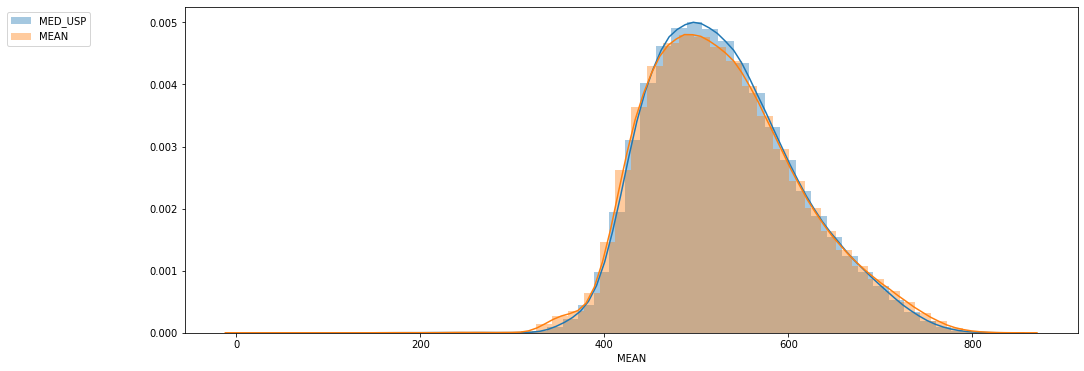

In [47]:
plt.figure(figsize=(16, 6))
sns.distplot(y.MED_USP, label='MED_USP')
sns.distplot(y.MEAN, label='MEAN')
plt.legend(bbox_to_anchor=(-0.1,1), loc='upper right')

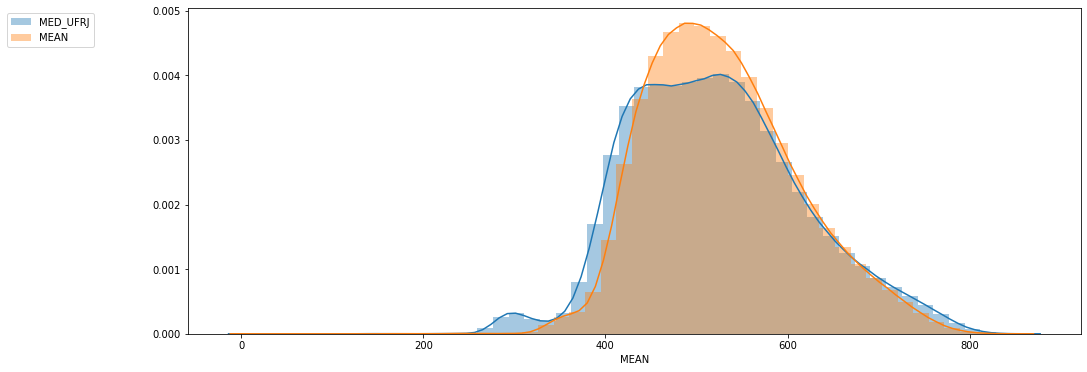

In [48]:
plt.figure(figsize=(16, 6))
sns.distplot(y.MED_UFRJ, label='MED_UFRJ')
sns.distplot(y.MEAN, label='MEAN')
plt.legend(bbox_to_anchor=(-0.1,1), loc='upper right')

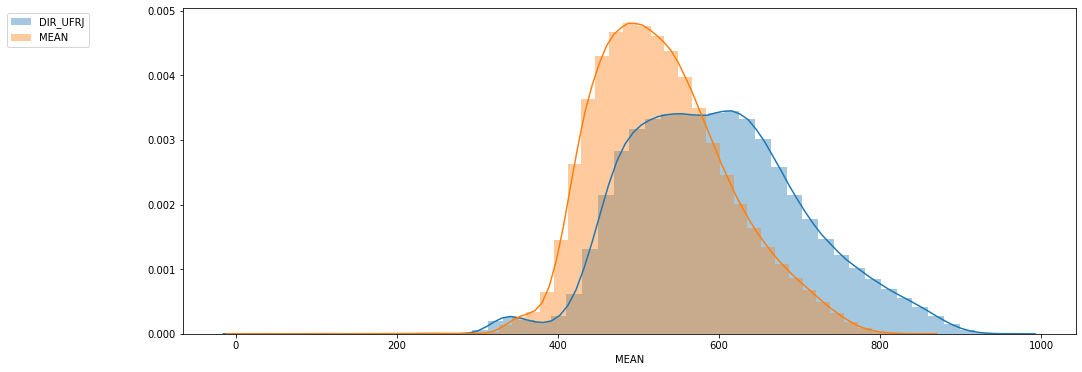

In [49]:
plt.figure(figsize=(16, 6))
sns.distplot(y.DIR_UFRJ, label='DIR_UFRJ')
sns.distplot(y.MEAN, label='MEAN')
plt.legend(bbox_to_anchor=(-0.1,1), loc='upper right')

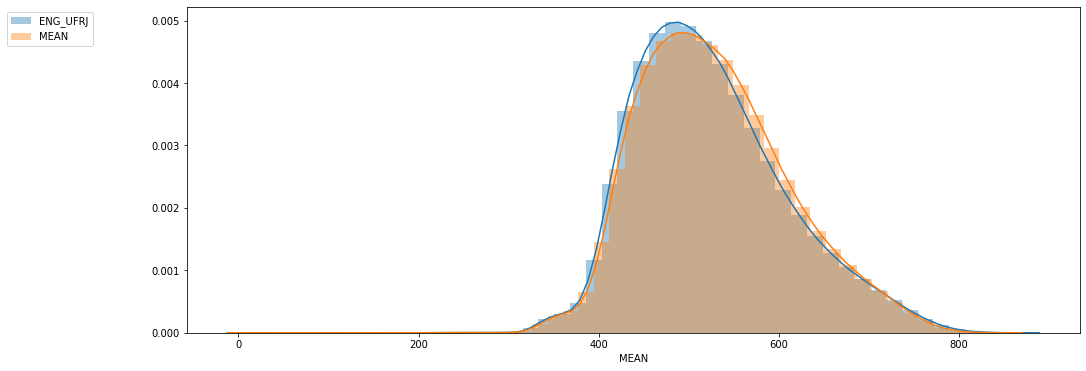

In [50]:
plt.figure(figsize=(16, 6))
sns.distplot(y.ENG_UFRJ, label='ENG_UFRJ')
sns.distplot(y.MEAN, label='MEAN')
plt.legend(bbox_to_anchor=(-0.1,1), loc='upper right')

Observamos então, que há uma alta correlação entre as médias e isso se deve a forma como os pesos são distribuídos. Os pesos possuem uma variação muito sutil (de 1 a 2 pontos apenas). Sendo assim, sem prejuízo iremos escolher a coluna MEAN para o primeiro método de seleção de características.

## Seleção com Aprendizado de Máquina

### 1. Seleção Univariada

Esse método está implementado no pacote Scikit Learn e serve para selecioar as K melhores características a partir de estatísticas univaridas. 

Refrências: 
1. https://scikit-learn.org/stable/modules/feature_selection.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [51]:
feature_selector = SelectKBest(score_func=f_regression, k=10)
feature_selector.fit_transform(X, y.MEAN)

array([[1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 1., ..., 1., 1., 0.],
       [4., 7., 1., ..., 1., 1., 0.],
       ...,
       [7., 1., 1., ..., 0., 1., 0.],
       [4., 3., 1., ..., 2., 1., 2.],
       [0., 1., 1., ..., 0., 1., 0.]])

### SelectKBest - características mais importantes 

In [52]:
X.columns[feature_selector.get_support()]

Index(['Q002', 'Q006', 'Q008', 'Q010', 'Q018', 'Q019', 'Q022', 'Q024', 'Q025',
       'Q027'],
      dtype='object')

Como essas características se relacionam com a média?

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


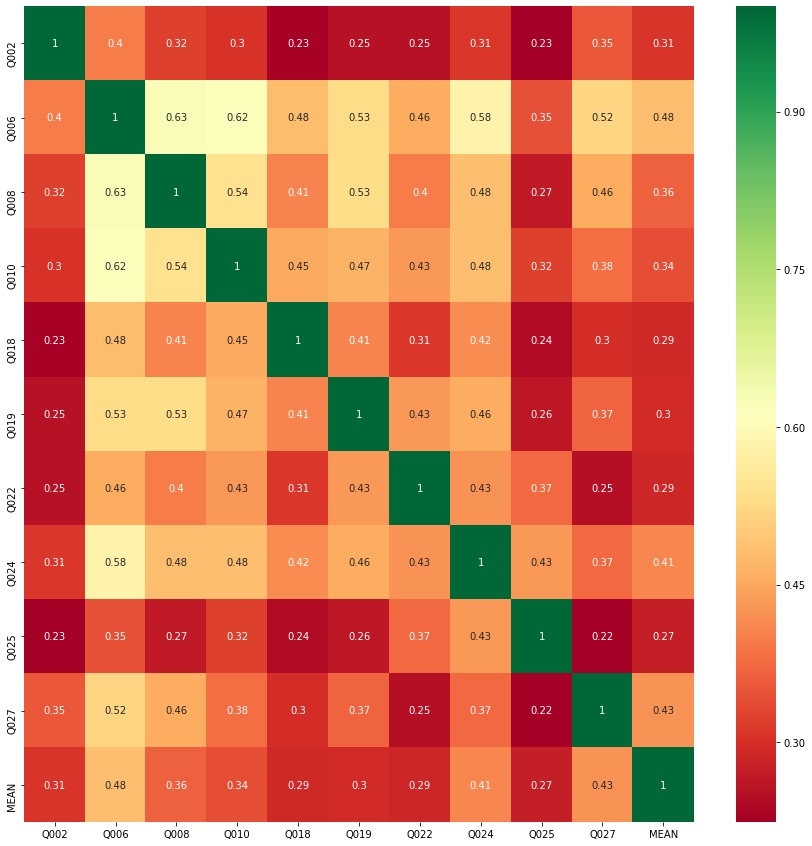

In [53]:
#plot heat map
plt.figure(figsize=(15,15))
X['MEAN'] = (y.NU_NOTA_CN+ y.NU_NOTA_CH+ y.NU_NOTA_LC + y.NU_NOTA_MT + y.NU_NOTA_REDACAO)/5
g=sns.heatmap(X[['Q002', 'Q006', 'Q008', 'Q010', 'Q018', 'Q019', 'Q022', 'Q024', 'Q025',
       'Q027', 'MEAN']].corr(),annot=True,cmap="RdYlGn")

In [54]:
feature_selector.scores_

array([1.29243266e+04, 7.11539926e+04, 6.96839075e+04, 8.87092030e+04,
       2.13451348e+04, 1.07485619e+04, 1.59203897e+05, 8.82714610e+03,
       8.41722156e+04, 8.24722594e+04, 2.60859696e+02, 5.70178134e+03,
       6.79064002e+04, 8.46753112e+03, 2.69644399e+05, 4.09813254e+05,
       2.47876082e+05, 3.02201654e+05, 3.19617408e+04, 1.18306240e+06,
       1.58642124e+05, 5.94338396e+05, 1.99990283e+05, 5.11683526e+05,
       6.77524048e+03, 6.66104336e+04, 2.88064183e+05, 2.81320041e+05,
       5.70670185e+04, 3.09580912e+05, 6.78403790e+04, 3.56831420e+05,
       3.73761773e+05, 3.49425977e+04, 2.89237117e+05, 3.45943659e+05,
       2.87964056e+05, 7.96270522e+05, 3.16133354e+05, 2.59080800e+02,
       8.70158939e+05])

In [55]:
kBest_df = pd.DataFrame(dict(feature_names= X.columns[:-1] , scores = feature_selector.scores_))\
    .sort_values('scores',ascending = False)[:15]

In [56]:
questoes = pd.read_csv(QUEST_FILE_PATH, sep=';')

Mas que caracterísitcas são essas?

In [57]:
kBest_df.merge(questoes, how='left', left_on='feature_names', right_on='n_questao')[['feature_names','descricao','scores']]

,feature_names,descricao,scores
0,Q006,Qual é a renda mensal de sua família? (Some a ...,1.183062e+06
1,Q027,Em que tipo de escola você frequentou o Ensino...,8.701589e+05
2,Q024,Na sua residência tem computador?,7.962705e+05
3,Q008,Na sua residência tem banheiro?,5.943384e+05
4,Q010,Na sua residência tem carro?,5.116835e+05
5,Q002,"Até que série sua mãe, ou a mulher responsável...",4.098133e+05
6,Q019,Na sua residência tem televisão em cores?,3.737618e+05
7,Q018,Na sua residência tem aspirador de pó?,3.568314e+05
8,Q022,Na sua residência tem telefone celular?,3.459437e+05
9,Q025,Na sua residência tem acesso à Internet?,3.161334e+05


### 2. Seleção a partir de Modelo

A seleção a partir de modelo é outro método implementado no Scikit Learn. Nesse método, treina-se um modelo de aprendizado de máquina e observa-se as características que receberam importância maior para o treinamento.

Referências:
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
2. https://scikit-learn.org/stable/modules/feature_selection.html
3. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html

Antes de realizar tal seleção dividiremos os conjuntos de dados em treinamento e teste:

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X[microdados_enem_features], y.MEAN, test_size=0.35, random_state=7)

In [62]:
X_train, X_test, y_train2, y_test2 = train_test_split(X[microdados_enem_features], y.MEAN_GROUPS, test_size=0.35, random_state=7)

In [63]:
print("Train and Test Shapes:\nX_train.shape: {} y_train.shape: {}\nX_test.shape: {} y_test.shape: {}".format(
      X_train.shape, y_train.shape, X_test.shape, y_test.shape)) 

Train and Test Shapes:
X_train.shape: (2530883, 41) y_train.shape: (2530883,)
X_test.shape: (1362784, 41) y_test.shape: (1362784,)


### 2.1 Lasso

Referênica: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [64]:
clf_lasso = Lasso(alpha=0.1)

sfm = SelectFromModel(clf_lasso)
sfm.fit(X_train, y_train)
X_transform = sfm.transform(X_train)
n_features = X_transform.shape[1]

X_transform

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5567052045.41951, tolerance: 1730699.7241996988
  positive)


array([[2.111300e+06, 2.100000e+01, 3.700000e+01, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [3.170206e+06, 3.100000e+01, 2.300000e+01, ..., 2.000000e+00,
        1.000000e+00, 0.000000e+00],
       [5.217609e+06, 5.200000e+01, 1.800000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [3.304557e+06, 3.300000e+01, 2.000000e+01, ..., 1.000000e+00,
        1.000000e+00, 5.000000e+00],
       [3.510609e+06, 3.500000e+01, 1.700000e+01, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [3.116704e+06, 3.100000e+01, 1.800000e+01, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00]])

### Lasso - carcatrísticas mais relevantes

In [65]:
X_train.columns[sfm.get_support()]

Index(['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q011', 'Q012', 'Q013', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
       'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q027'],
      dtype='object')

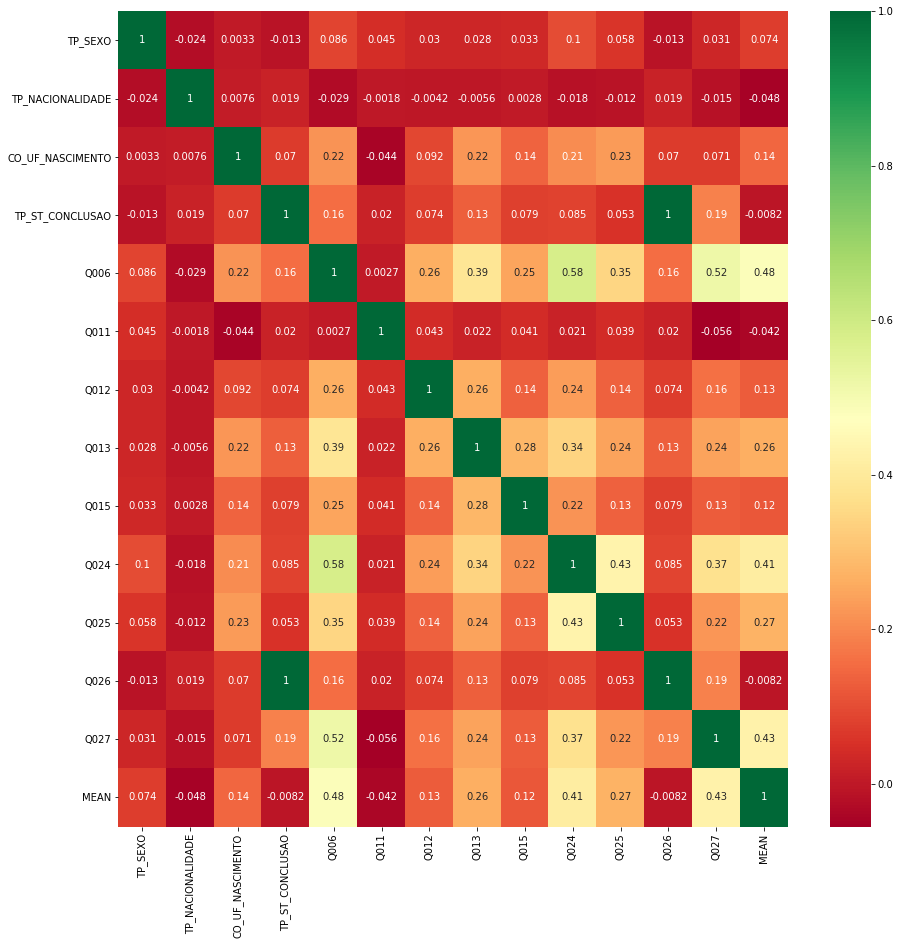

In [66]:
plt.figure(figsize=(15,15))
g=sns.heatmap(X[['TP_SEXO', 'TP_NACIONALIDADE', 'CO_UF_NASCIMENTO', 'TP_ST_CONCLUSAO',
       'Q006', 'Q011', 'Q012', 'Q013', 'Q015', 'Q024', 'Q025', 'Q026', 'Q027','MEAN']].corr(),annot=True,cmap="RdYlGn")

### 2.2 Regressão Linear

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [67]:
clf_lreg = LinearRegression()

sfm = SelectFromModel(clf_lreg)
sfm.fit(X_train, y_train)
X_transform = sfm.transform(X_train)
n_features = X_transform.shape[1]

X_transform

array([[ 1., 21.,  1., ...,  1.,  0.,  0.],
       [ 1., 31.,  1., ...,  1.,  0.,  0.],
       [ 1., 21.,  2., ...,  0.,  1.,  0.],
       ...,
       [ 3., 33.,  1., ...,  1.,  0.,  5.],
       [ 1., 35.,  2., ...,  1.,  1.,  0.],
       [ 1., 31.,  2., ...,  1.,  1.,  0.]])

### 2.3 Seleção a partir de Classificador 

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05564395 0.0466738  0.03198052 0.04596069 0.01401809 0.01150876
 0.03230592 0.00713026 0.04578118 0.03257379 0.00645451 0.02521119
 0.01023672 0.0035333  0.04075182 0.03927012 0.03657249 0.03092095
 0.04110291 0.05460165 0.00791956 0.02407342 0.03167373 0.02210852
 0.02093606 0.00860622 0.01857219 0.01790016 0.01200368 0.01758537
 0.00405185 0.0109834  0.02640343 0.01936145 0.01455607 0.03340039
 0.01241392 0.02918311 0.0163654  0.00673626 0.03293319]


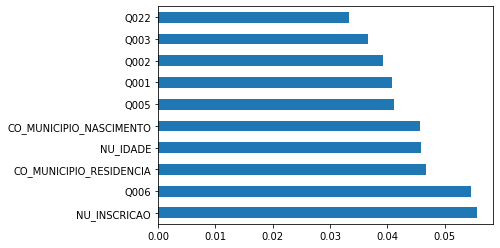

In [68]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Análise de componentes PCA

A análise de componentes principais é um método de redução de dimensionalide de conjunto de dados. Nesse método ocorre uma projeção de um espaço maior em um espaço de dimensão menor. Sendo assim, sada compoenente PCA é um vetor com coeficientes para cada uma das variáveis do conjunto de dados. Analisando esse coeficientes podemos identificar quais as características mais relevantes em cada componente.

Referências:
1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

In [69]:
pca = decomposition.PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
pca.explained_variance_ratio_

array([6.49073456e-01, 3.31328854e-01, 1.95976897e-02, 1.11147051e-11,
       2.75733008e-12, 8.35264578e-13, 7.80059318e-13, 3.95907520e-13,
       3.48153809e-13, 3.16146724e-13])

Embora tenhamos realizado uma decomposição em componente principais, analisando a variância podemos observar que as duas primeiras componentes guardam 98% da informação da projeção, portanto analisaremos apenas os coeficientes dessas duas componentes para as características:

In [71]:
#pca.components_

In [72]:
pc_components = pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5',
                                                                  'PC-6','PC-7','PC-8','PC-9','PC-10'])

In [73]:
pc_components.loc['PC-1'].sort_values(ascending=False)[:20]

NU_INSCRICAO               9.997252e-01
CO_MUNICIPIO_RESIDENCIA    1.697187e-02
CO_MUNICIPIO_NASCIMENTO    1.617195e-02
NU_IDADE                   1.988258e-07
CO_UF_RESIDENCIA           1.678983e-07
CO_UF_NASCIMENTO           1.600319e-07
Q006                       1.448310e-07
TP_ANO_CONCLUIU            1.178327e-07
Q027                       3.343202e-08
Q010                       2.614031e-08
Q004                       2.525815e-08
Q002                       2.524580e-08
Q008                       2.059892e-08
Q009                       1.920878e-08
TP_SEXO                    1.882424e-08
IN_TREINEIRO               1.661433e-08
Q001                       1.654071e-08
Q024                       1.552582e-08
Q014                       1.523811e-08
Q022                       1.507852e-08
Name: PC-1, dtype: float64

In [74]:
pc_components.loc['PC-2'].sort_values(ascending=False)[:20]

CO_MUNICIPIO_RESIDENCIA    7.128056e-01
CO_MUNICIPIO_NASCIMENTO    7.009699e-01
CO_UF_RESIDENCIA           7.104220e-06
CO_UF_NASCIMENTO           6.984512e-06
Q006                       5.745953e-07
Q010                       1.457337e-07
Q003                       1.315824e-07
Q022                       1.289860e-07
Q024                       1.259260e-07
Q001                       1.179431e-07
Q004                       1.158899e-07
Q016                       1.134454e-07
Q014                       1.106480e-07
Q002                       1.026217e-07
Q013                       9.289598e-08
Q023                       7.918958e-08
Q025                       7.695937e-08
Q018                       7.427917e-08
Q009                       7.382918e-08
Q008                       7.345535e-08
Name: PC-2, dtype: float64

## Conclusão

Os diferentes métodos utilizados nos permitem verificar a relevância das caracteríticas que se referem a condições socioeconômicas, tais como:

1. Q006 - Renda mensal da família
2. Q027 - Tipo de escola frequentou
3. Q002 - Escolaridade da mãe
4. Infraestrutura da residência: computador, telefone celular, internet, banheiro, geladeira, veículo de transporte

A análise feita nesse notebook por Kizzy Terra complementa se com as visualizações disponíveis no notebook: *Visualizando características dos microdados do ENEM*